In [6]:
# Load dependencies
import torch
from torch import nn # neural network
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Check PyTorch version
print(torch.__version__, torch.cuda.is_available())

2.0.1 True


## Linear Regression Model plan
Linear regression formula: <b>$\hat{Y} or f(X) = aX + b$</b>  
where  
The true relationship is: $Y = aX + b + \epsilon$ i.e. the model prediction plus error from the true values/relationship
\hat{Y} or f(X): Model prediction or dependent variable
X: dependent variable
a: slope, or, in the case of NN - weights
b: intercept, or, in the case of NN - biases

In [3]:
# Create *known* parameters i.e. weight and bias
weight = 0.75 # E[0,1] as we want to initialize our basic model with torch.randn 
bias = 0.29 # E[0,1] as we want to initialize our basic model with torch.randn 

# Create X-dim interval
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1) # add another set of brackets for further manipulation

# Create *known* Y = aX + b i.e. true values of Y
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2900],
         [0.3050],
         [0.3200],
         [0.3350],
         [0.3500],
         [0.3650],
         [0.3800],
         [0.3950],
         [0.4100],
         [0.4250]]))

In [4]:
# print(len(X), len(Y)) 50 data points

# Create train/test data 80/20
RANDOM_SEED = 57
random.seed(RANDOM_SEED)

index_shuffled = random.sample(range(0, len(X)), len(X))
train_test_index_split = int(0.8*len(X))
train_index = index_shuffled[:train_test_index_split]
test_index = index_shuffled[train_test_index_split:]

X_train, y_train = X[train_index], y[train_index]
X_test, y_test = X[test_index], y[test_index]

In [12]:
# Plot function
def plot_predictions(train_data,
                    train_labels,
                    test_data,
                    test_labels,
                    predictions=None):
    """
    Plots training, test data and compares Linear Regression model predictions
    """
    plt.figure(figsize=(10, 7))
    
    # Plot training data (blue)
    plt.scatter(train_data, train_labels, c="b", s=12, label="Training data")
    
    # Plot test data (green)
    plt.scatter(test_data, test_labels, c="g", s=12, label="Testing data")
    
    # Are there predictions? (red)
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=12, label="Predictions")
        
    # Show the legend
    plt.legend(prop={"size": 14})
    
    plt.show()

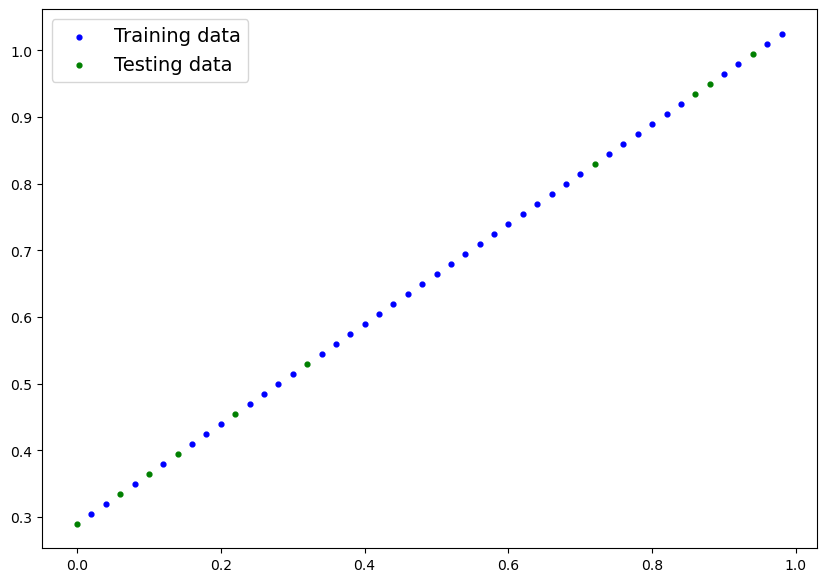

In [13]:
plot_predictions(X_train, y_train, X_test, y_test)

In [7]:
# Create PyTorch Linear Regression model
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from the base class of nn.Module
    def __init__(self):
        super().__init__() # call init constructor from nn.Module with super reference
        self.weight = nn.Parameter(torch.randn(1, # only 1 weight is needed for this Linear Regression Model...
                                               #... and start with a random weight
                                              requires_grad=True, # update via gradient descent: Yes
                                              dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1, # only 1 bias is needed for this Linear Regression Model...
                                               #... and start with a random bias
                                            requires_grad=True, # update via gradient descent: Yes
                                            dtype=torch.float))
        
        # forward() method to define the computation in the model i.e. the model formula
        # (!) actually overrides the nn.Module forward() method
        def forward(self, x: torch.Tensor) -> torch.Tensor: # where x is the input data, in the format of a torch.Tensor
            return self.weights * x + self.bias # this is y = aX + b, the linear regression formula
        
        # PyTorch will run Gradient Descent and Backpropagation to update the weight and bias.